In [1]:
import tensorflow as tf
import numpy as np
from random import shuffle
from tensorflow.contrib import rnn
tf.logging.set_verbosity(tf.logging.INFO)
tf.reset_default_graph()
from IPython.core.display import Image, display
from collections import deque
import gym
import random

# 1. Q Learning based on Q-table

### initialize

In [2]:
from gym.envs.registration import register
register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False}, # for testing purpose, set it to be deterministic
    max_episode_steps=100,
    reward_threshold=0.78, # optimum = .8196
)

In [3]:
env = gym.make('FrozenLakeNotSlippery-v0')
action_size = env.action_space.n
state_size = env.observation_space.n

In [4]:
print('Action size is: ' + str(action_size))
print('State size is: ' + str(state_size))

Action size is: 4
State size is: 16


In [5]:
qtable = np.zeros((state_size, action_size))
print(qtable)

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


### params

In [12]:
total_episodes = 50000        # Total episodes
learning_rate = 0.8           # Learning rate
max_steps = 99                # Max steps per episode
gamma = 0.95                  # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.01             # Exponential decay rate for exploration prob

### Use Q Table Algorithm

In [13]:
rewards = []

for episode in range(total_episodes):
    
    # reset evn
    state = env.reset() # set state --> 0, state from {0,1,2,...,15} 
    step = 0
    done = False
    rewards_episode = 0
    
    # start this episode
    for step in range(max_steps):
        
        # decide action
        random_0_1 = random.uniform(0, 1)
        if random_0_1 > epsilon: # exploitation
            action = np.argmax(qtable[state,:]) # select max q action given state
            
        else: # exploration
            action = env.action_space.sample() # action sampled from {0,1,2,3}
            #LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3
        
        # implement action
        new_state, reward, done, info = env.step(action) # reward from {0,1}, done from {True, False}
        
        # update q table
        qtable[state, action] = qtable[state, action] + \
            learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])
            
        # update reward and state
        rewards_episode += reward
        state = new_state

        # Do not continue if done
        if done == True: 
            break
            
    # After finishing one episode
    episode += 1
    
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 
    rewards.append(rewards_episode)

print(qtable)

[[ 0.73509189  0.77378094  0.6983373   0.73509189]
 [ 0.73509189  0.          0.          0.55866984]
 [ 0.6983373   0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.77378094  0.81450625  0.          0.73509189]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.66342043]
 [ 0.          0.          0.          0.        ]
 [ 0.81450625  0.          0.857375    0.77378094]
 [ 0.81450625  0.9025      0.9025      0.        ]
 [ 0.857375    0.95        0.          0.63024941]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.9025      0.95        0.857375  ]
 [ 0.9025      0.95        1.          0.9025    ]
 [ 0.          0.          0.          0.        ]]


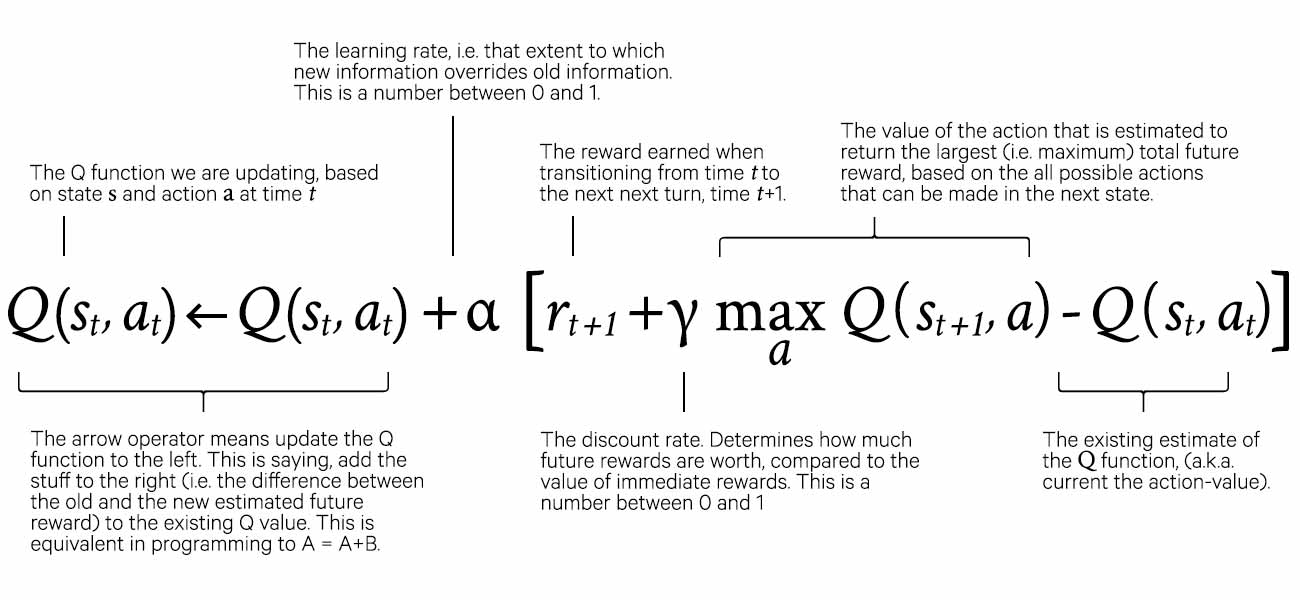

In [26]:
# Formula
display(Image('https://randomant.net/images/algorithm-behind-curtain-2/q_learning_algorithm.jpg', width=500, unconfined=True))

### Run the game

In [15]:
env.reset()
rewards = []

for episode in range(5):
    
    state = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):
       
        env.render()
        action = np.argmax(qtable[state,:])
        new_state, reward, done, info = env.step(action)
        
        if done:
            break
        state = new_state
        
env.close()

****************************************************
EPISODE  0

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
****************************************************
EPISODE  1

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
****************************************************
EPISODE  2

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
****************************************************
EPISODE  3

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
****************************************************
EPISODE  4

SFFF
FH

## 2. Q Learning based on deep learning NN

### initialize env

In [41]:
env = gym.make('Pong-v0')
observation = env.reset()
observation.shape

(210, 160, 3)

### preprocess to reduce space
https://github.com/dhruvp/atari-pong/blob/master/me_pong.py

In [47]:
def downsample(image):
    # Take only alternate pixels - basically halves the resolution of the image (which is fine for us)
    return image[::2, ::2, :]

def remove_color(image):
    """Convert all color (RGB is the third dimension in the image)"""
    return image[:, :, 0]

def remove_background(image):
    image[image == 144] = 0
    image[image == 109] = 0
    return image

def preprocess_state(input_observation):
    """ convert the 210x160x3 uint8 frame into a 6400 float vector """
    processed_observation = input_observation[35:195] # crop
    processed_observation = downsample(processed_observation)
    processed_observation = remove_color(processed_observation)
    processed_observation = remove_background(processed_observation)
    processed_observation[processed_observation != 0] = 1 # everything else (paddles, ball) just set to 1
    
    # Convert from 80 x 80 matrix to 1600 x 1 matrix
    processed_observation = processed_observation.astype(np.float32).ravel()
    return processed_observation

In [48]:
preprocess_state(observation).shape

(6400,)

### hyperparams

In [64]:
# Basic
total_episodes = 5        # Total episodes
learning_rate = 0.8           # Learning rate
max_steps = 99                # Max steps per episode
gamma = 0.95                  # Discounting rate

# Exploration parameters for epsilon greedy strategy
explore_start = 1.0            # exploration probability at start
explore_stop = 0.01            # minimum exploration probability 
decay_rate = 0.0001            # exponential decay rate for exploration prob

# Memory
memory_size = 50000
batch_size = 64
pretrain_length = batch_size
possible_actions = [2,3]

### define memory
https://medium.freecodecamp.org/an-introduction-to-deep-q-learning-lets-play-doom-54d02d8017d8

In [32]:
class Memory():
    def __init__(self, max_size):
        self.buffer = deque(maxlen = max_size)
    
    def add(self, experience):
        self.buffer.append(experience)
    
    def sample(self, batch_size):
        buffer_size = len(self.buffer)
        index = np.random.choice(np.arange(buffer_size),
                                size = batch_size,
                                replace = False)
        
        return [self.buffer[i] for i in index]

In [55]:
# Render the environment
init_state = env.reset()

# Instantiate memory
memory = Memory(max_size = memory_size)

for i in range(pretrain_length):
    if i == 0:
        state = init_state
        
    # Random action
    action = random.choice(possible_actions)
    next_state, reward, done, info = env.step(action)
    
    if done:
        next_state = np.zeros(state.shape)
    else:
        next_state = next_state
        
    memory.add((preprocess_state(state), action, reward, preprocess_state(next_state), done))
    
    if done:
        state = env.reset()
    else:
        state = next_state

In [56]:
memory.sample(1)

[(array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
  3,
  0.0,
  array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
  False)]

### define NN (for now, simplest 1-hidden layer NN)

In [105]:
def Q_learning_NN(features, labels, mode):
    
    # Read action
    actions = features['actions']
    
    # input state
    input_layer = features['states']
    input_layer = tf.layers.flatten(input_layer) # - 6400
    
    # hidden layer
    num_hidden_units = 200
    hidden = tf.layers.dense(inputs = input_layer , 
                            units = num_hidden_units,
                            activation = tf.nn.relu)

    # FC layer (dense layer)
    logits = tf.layers.dense(inputs = hidden, units = 2)# move up or down
    
    Final_EstimatorSpec = GenerateEstimatorSpec_Q(logits, labels, mode, actions)
    return(Final_EstimatorSpec)

In [114]:
def GenerateEstimatorSpec_Q(logits, targets, mode, actions):
    # Generate Predictions
    predictions = {
      "best_action_index":  tf.argmax(input = logits, axis=1),
      "predicted_maxQ": tf.reduce_max(logits)
    }
    
    # If during PREDICTION mode, just return the predictions
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode = mode, 
                                          predictions = predictions)
    
    # If during TRAIN, calculate squared loss
    predicted_Qs = tf.reduce_sum(tf.multiply(logits, actions), axis=1) # e.g., [q1, q2] * [1.0, 0.0] for 1st action
    loss = tf.reduce_mean(tf.square(targets - predicted_Qs))

    # If during TRAIN, update gradients
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
        train_op = optimizer.minimize(
            loss = loss,
            global_step = tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode = mode, 
                                          loss = loss, 
                                          train_op = train_op)

![image](https://cdn-images-1.medium.com/max/1760/1*ZqML2CCqo455qkxlxJTT2Q.png)

In [115]:
Q_classifier = tf.estimator.Estimator(
    model_fn = Q_learning_NN, # model function type, 
    model_dir = "./model_files_3",
    params = None)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './model_files_3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c1fb6d940>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [116]:
def get_prediction(state, Q_classifier):
    pred_input_fn = tf.estimator.inputs.numpy_input_fn(
        x = {"x": state}, #features 
        y = None,
        shuffle = False)
    
    best_action_index = []
    predicted_maxQ = []
    
    pred_results = Q_classifier.predict(input_fn = pred_input_fn)
    for pred in pred_results:
        best_action_index.append(pred['best_action_index'])
        predicted_maxQ.append(pred['predicted_maxQ'])
    
    return {'best_action_index': best_action_index, 
            'predicted_maxQ': predicted_maxQ}

In [94]:
            next_state = next_state
            memory.add((preprocess_state(state), action, reward, preprocess_state(next_state), done))
            state = next_state          

In [ ]:
decay_step = 0 # explore/exploit trade-off

for episode in range(total_episodes):
    
    # initialize game
    state = env.reset()
    step = 0
    done = False
    reward = 0
        
    print("****************************************************")
    print("EPISODE ", episode)

    while step < max_steps:
        
        # increase decay
        decay_step +=1
        step += 1
        
        # decide action
        random_0_1 = random.uniform(0, 1)
        explore_probability = explore_stop + (explore_start - explore_stop) * np.exp(-decay_rate * decay_step)
        
        if random_0_1 <= explore_probability or (step == 0 and episode == 0): # exploration
            action = random.choice(possible_actions) # action sampled from {2,3}
            
        else: # exploration
            best_action_index = get_prediction(state, Q_classifier)['best_action_index'][0]
            action = possible_actions[best_action_index]
            
        # implement best action
        next_state, reward, done, info = env.step(action) # reward from {0,1}, done from {True, False}
        
        # update reward and state
        rewards_episode += reward
        
        if done:
            next_state = np.zeros(state.shape)
            memory.add((preprocess_state(state), action, reward, preprocess_state(next_state), done))
            state = env.reset()
            step = max_steps
            
        else:
            next_state = next_state
            memory.add((preprocess_state(state), action, reward, preprocess_state(next_state), done))
            state = next_state            

            
        ### train model at every step            

        # Obtain random mini-batch from memory

        batch = memory.sample(batch_size)
        states = np.array([each[0] for each in batch]) # 6400
        actions = np.array([each[1] for each in batch])
        rewards = np.array([each[2] for each in batch]) 
        next_states = np.array([each[3] for each in batch])
        dones = np.array([each[4] for each in batch])

        target_Qs_batch = []

        # Get maxQ values for next_state 
        if episode>=1:
            next_state_maxQs = get_prediction(next_states, Q_classifier)['predicted_maxQ']
        else:
            next_state_maxQs = [0] * batch_size
        
        # Calculate Target Q values for each state in batch
        for i in range(0, len(batch)):
            done = dones[i]
            if done:
                target_Qs_batch.append(rewards[i])
            else:
                target = rewards[i] + gamma * np.max(next_state_maxQs[i])
                target_Qs_batch.append(target)

        target_Qs = np.array([each for each in target_Qs_batch])

        # define input
        train_input_fn = tf.estimator.inputs.numpy_input_fn(
            x = {'states': states, 
                 'actions': np.array([np.array([1.0,0.0], dtype = np.float64) \
                                      if action == 2 else \
                                      np.array([0.0,1.0], dtype = np.float64) for action in actions])},
            y = target_Qs, # targets/labels
            batch_size = batch_size, 
            num_epochs = None,
            shuffle = True)
        
        # train model
        Q_classifier.train(
            input_fn = train_input_fn,
            steps = 1)

In [120]:
Q_classifier.train(
    input_fn = train_input_fn,
    steps = 1)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from ./model_files_3/model.ckpt-12
INFO:tensorflow:Saving checkpoints for 13 into ./model_files_3/model.ckpt.
INFO:tensorflow:loss = 0.00839847946647, step = 13
INFO:tensorflow:Loss for final step: 0.00839847946647.
